<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [136]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from sklearn.model_selection     import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense, Dropout, Flatten, \
Conv2D, MaxPooling2D
from tensorflow.keras            import utils

### Read in train data

In [126]:
train = pd.read_csv('train.csv')
X = train.drop(columns='label')
y = train['label']
X_train,X_test,y_train,y_test = \
train_test_split(X,y)

In [127]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [128]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [129]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test =  X_test.reshape(X_test.shape[0], 28, 28, 1)

In [130]:
y_train = utils.to_categorical(y_train,10)
y_test =  utils.to_categorical(y_test,10)

### Modeling

In [137]:
model = Sequential()
model.add(Conv2D(filters=10,              
                 kernel_size=(3,3),      
                 activation='elu',    
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,
                     kernel_size=(3,3),
                     activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.00001),
                  metrics=['accuracy'])

In [143]:
history= model.fit(X_train,y_train,
                    batch_size=128,
                    validation_data=(X_test,y_test),
                    epochs=10,verbose=1)

Epoch 1/10
247/247 [==============================] - 4s 16ms/step - loss: 0.6596 - accuracy: 0.8519 - val_loss: 0.6222 - val_accuracy: 0.8563
Epoch 2/10
247/247 [==============================] - 4s 16ms/step - loss: 0.5955 - accuracy: 0.8604 - val_loss: 0.5648 - val_accuracy: 0.8642
Epoch 3/10
247/247 [==============================] - 4s 16ms/step - loss: 0.5440 - accuracy: 0.8695 - val_loss: 0.5191 - val_accuracy: 0.8691
Epoch 4/10
247/247 [==============================] - 4s 16ms/step - loss: 0.5023 - accuracy: 0.8761 - val_loss: 0.4817 - val_accuracy: 0.8756
Epoch 5/10
247/247 [==============================] - 4s 16ms/step - loss: 0.4679 - accuracy: 0.8813 - val_loss: 0.4505 - val_accuracy: 0.8819
Epoch 6/10
247/247 [==============================] - 4s 16ms/step - loss: 0.4390 - accuracy: 0.8871 - val_loss: 0.4246 - val_accuracy: 0.8856
Epoch 7/10
247/247 [==============================] - 4s 16ms/step - loss: 0.4145 - accuracy: 0.8913 - val_loss: 0.4027 - val_accuracy: 0.8899

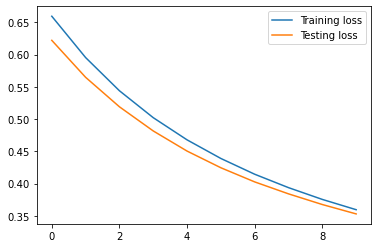

In [144]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.legend();

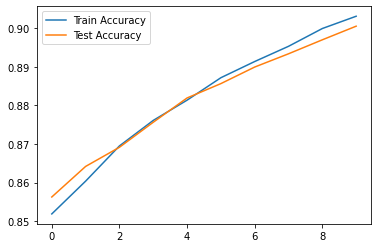

In [145]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend();

In [146]:
y_pred = model.predict(X_test)

329/329 [==============================] - 1s 3ms/step


In [148]:
y_pred.shape

(10500, 10)

### Read in test data

In [152]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
test = np.array(test)

In [159]:
test = test.reshape(test.shape[0], 28, 28, 1)

In [163]:
predictions = model.predict(test)
predictions = pd.DataFrame(predictions)

875/875 [==============================] - 2s 3ms/step


In [164]:
predictions.to_csv("predictions.csv")